# Sprint課題 機械学習スクラッチ入門

In [693]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [736]:
# データの読み込み
from sklearn.datasets import load_iris
iris = load_iris()
feature_data = iris.data
target_data = iris.target
c = np.c_[feature_data,target_data]
data = c[c[:,4] >= 1]
X_iris = data[:,0:4]
y_iris = data[:,4]
y_iris.shape
X_iris.shape

(100, 4)

In [737]:
# データセットの作成①
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)

random_index = np.random.permutation(np.arange(n_samples))
X1 = X[random_index]
y1 = y[random_index]

In [738]:
# データセットの作成②
X2 = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y2 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# 【問題1】train_test_splitのスクラッチ

In [758]:
def scratch_train_test_split(X,y,train_size=0.8):
    np.random.seed(seed=0)
    # サンプル数と同じ数の0～１未満の乱数
    arr_rand = np.random.rand(X.shape[0])
    # train_size％に入る
    split = arr_rand < np.percentile(arr_rand, 100*train_size)
    
    # Xをtrainとtestに分ける
    X_train = X[split]
    X_test =  X[~split]
    # ｙをtrainとtestに分ける
    y_train = y[split]
    y_test = y[~split]
    
    return X_train,X_test,y_train,y_test

### 検証①　iris

In [759]:
# 自作
X_train,X_test,y_train,y_test = scratch_train_test_split(X_iris,y_iris,train_size=0.8)
print('scratch_train_test_split:')
print('分割前X:',X_iris.shape)
print('分割前ｙ:',y_iris.shape)
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

scratch_train_test_split:
分割前X: (100, 4)
分割前ｙ: (100,)
X_train: (80, 4)
X_test: (20, 4)
y_train: (80,)
y_test: (20,)


In [760]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_iris,y_iris,test_size=0.2)
print('sklearn train_test_split:')
print('分割前X:',X_iris.shape)
print('分割前ｙ:',y_iris.shape)
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

sklearn train_test_split:
分割前X: (100, 4)
分割前ｙ: (100,)
X_train: (80, 4)
X_test: (20, 4)
y_train: (80,)
y_test: (20,)


### 検証② データセット１

In [761]:
# 自作
X_train,X_test,y_train,y_test = scratch_train_test_split(X1,y1,train_size=0.8)
print('scratch_train_test_split:')
print('分割前X:',X1.shape)
print('分割前ｙ:',y1.shape)
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

scratch_train_test_split:
分割前X: (500, 2)
分割前ｙ: (500,)
X_train: (400, 2)
X_test: (100, 2)
y_train: (400,)
y_test: (100,)


In [762]:
# train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.2)
print('sklearn train_test_split:')
print('分割前X:',X1.shape)
print('分割前ｙ:',y1.shape)
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

sklearn train_test_split:
分割前X: (500, 2)
分割前ｙ: (500,)
X_train: (400, 2)
X_test: (100, 2)
y_train: (400,)
y_test: (100,)


### 検証③　データセット２

In [763]:
# 自作
X_train,X_test,y_train,y_test = scratch_train_test_split(X2,y2,train_size=0.8)
print('scratch_train_test_split:')
print('分割前X:',X2.shape)
print('分割前ｙ:',y2.shape)
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

scratch_train_test_split:
分割前X: (40, 2)
分割前ｙ: (40,)
X_train: (32, 2)
X_test: (8, 2)
y_train: (32,)
y_test: (8,)


In [764]:
# train_test_split
X_train,X_test,y_train,y_test = train_test_split(X2,y2,test_size=0.2)
print('sklearn train_test_split:')
print('分割前X:',X2.shape)
print('分割前ｙ:',y2.shape)
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

sklearn train_test_split:
分割前X: (40, 2)
分割前ｙ: (40,)
X_train: (32, 2)
X_test: (8, 2)
y_train: (32,)
y_test: (8,)


# 【問題2】 分類問題を解くコードの作成
## １．ロジスティック回帰

In [767]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

def logi(X=X,y=y,train_size=0.7):
    # trainデータとtestデータに分ける
    X_train,X_test,y_train,y_test = scratch_train_test_split(X,y,train_size)
    
    # 標準化
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)

    # インスタンス化
    clf = linear_model.SGDClassifier(loss='log',max_iter=5)
    # 学習
    clf.fit(X_train_std,y_train)
    # 推定
    y_pred = clf.predict(X_test_std)
    
    # 評価
    print('accuracy:{}'.format(accuracy_score(y_test,y_pred)))
    print('precision:{}'.format(precision_score(y_test,y_pred)))
    print('recall:{}'.format(recall_score(y_test,y_pred)))
    print('F値:{}'.format(f1_score(y_test,y_pred)))
    
    return y_pred

In [770]:
# iris
log_pred_iris = logi(X=X_iris,y=y_iris,train_size=0.7)
log_pred_iris

accuracy:0.9333333333333333
precision:0.9444444444444444
recall:0.9444444444444444
F値:0.9444444444444444


C:\Users\miyas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


array([1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2.])

In [773]:
# データセット１
log_pred_1 = logi(X=X1,y=y1,train_size=0.7)
log_pred_1

accuracy:1.0
precision:1.0
recall:1.0
F値:1.0


C:\Users\miyas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


array([ 1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,
       -1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,
        1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1,
       -1,  1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1, -1,  1, -1,
       -1,  1, -1,  1, -1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,
        1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1, -1, -1,  1,
        1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,
       -1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1, -1, -1, -1])

In [774]:
# データセット２
log_pred_2 = logi(X=X2,y=y2,train_size=0.7)
log_pred_2

accuracy:0.5
precision:0.4444444444444444
recall:0.8
F値:0.5714285714285714


C:\Users\miyas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


array([1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1])

## ２．SVM

In [775]:
from sklearn.svm import LinearSVC

def linear_svc(X=X,y=y,train_size=0.7):
    # trainデータとtestデータに分ける
    X_train,X_test,y_train,y_test = scratch_train_test_split(X,y,train_size)

    # 標準化
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)
    
    # 初期化，学習，推定
    model = LinearSVC()
    model.fit(X_train_std,y_train)
    y_pred = model.predict(X_test_std)

    # 評価
    print('accuracy:{}'.format(accuracy_score(y_test,y_pred)))
    print('precision:{}'.format(precision_score(y_test,y_pred)))
    print('recall:{}'.format(recall_score(y_test,y_pred)))
    print('F値:{}'.format(f1_score(y_test,y_pred)))

    return y_pred

In [781]:
# iris
svm_pred_iris = linear_svc(X=X_iris,y=y_iris,train_size=0.7)
svm_pred_iris

accuracy:0.9
precision:0.9411764705882353
recall:0.8888888888888888
F値:0.9142857142857143


array([1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1.,
       1., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2.])

In [782]:
# データセット１
svm_pred_X1 = linear_svc(X=X1,y=y1,train_size=0.7)
svm_pred_X1

accuracy:1.0
precision:1.0
recall:1.0
F値:1.0


array([ 1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,
       -1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,
        1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1,
       -1,  1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1, -1,  1, -1,
       -1,  1, -1,  1, -1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,
        1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1, -1, -1,  1,
        1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,
       -1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1, -1, -1, -1])

In [785]:
# データセット２
svm_pred_X2 = linear_svc(X=X2,y=y2,train_size=0.7)
svm_pred_X2

accuracy:0.4166666666666667
precision:0.3333333333333333
recall:0.4
F値:0.3636363636363636


array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1])

## ３．決定木

In [757]:
from sklearn.tree import DecisionTreeClassifier

def tree(X,y,train_size):
    # trainデータとtestデータに分ける
    X_train,X_test,y_train,y_test = scratch_train_test_split(X,y,train_size)

    # インスタンス化
    model = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
    # 学習
    model.fit(X_train,y_train)
    # 推定
    y_pred = model.predict(X_test)

    # 評価
    print('accuracy:{}'.format(accuracy_score(y_test,y_pred)))
    print('precision:{}'.format(precision_score(y_test,y_pred)))
    print('recall:{}'.format(recall_score(y_test,y_pred)))
    print('F値:{}'.format(f1_score(y_test,y_pred)))
    
    return y_pred

In [786]:
# iris
tree_pred_iris = tree(X_iris,y_iris,0.7)
tree_pred_iris

accuracy:0.9333333333333333
precision:1.0
recall:0.8888888888888888
F値:0.9411764705882353


array([1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1.,
       1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [787]:
# データセット１
tree_pred_X1 = tree(X1,y1,0.7)
tree_pred_X1

accuracy:1.0
precision:1.0
recall:1.0
F値:1.0


array([ 1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,
       -1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,
        1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1,
       -1,  1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1, -1,  1, -1,
       -1,  1, -1,  1, -1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,
        1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1, -1, -1,  1,
        1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,
       -1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1, -1, -1, -1])

In [791]:
# データセット２
y_pred = tree(X2,y2,0.7)
y_pred

accuracy:0.75
precision:0.625
recall:1.0
F値:0.7692307692307693


array([1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1])

# 【問題3】 回帰問題を解くコードの作成
* 目的変数はSalePrice
* 説明変数はGrLivAreaとYearBuilt
* 勾配降下法を用いて計算するSGDRegressorクラスを利用
* StandardScalerは２次元配列に適用するように作られているので，ｙをreshapeした．
* Xもｙも標準化すれば，標準偏回帰係数が得られる？ので２パターンでやってみた．
* 誤差プロットがうまくいかない．
* 

In [792]:
# データの読み込み
df = pd.read_csv('C:/Users/miyas/kaggle/train.csv')
X = df.loc[:,['GrLivArea','YearBuilt']].values
y = df.SalePrice.values
y = np.array(y).reshape(-1,1)

In [793]:
# trainデータとtestデータに分ける
X_train,X_test,y_train,y_test = scratch_train_test_split(X,y,train_size=0.7)

# 標準化
sc_x = StandardScaler()
sc_y = StandardScaler()
sc_x.fit(X_train)
sc_y.fit(y_train)
X_train_std = sc_x.transform(X_train)
X_test_std = sc_x.transform(X_test)
y_train_std = sc_y.transform(y_train)
y_test_std = sc_y.transform(y_test)

C:\Users\miyas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\miyas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\miyas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\miyas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\miyas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted

In [799]:
# 初期化，学習，推定
clf = linear_model.SGDRegressor(max_iter=1000)
clf.fit(X_train_std, y_train_std)
y_train_pred = clf.predict(X_train_std)
y_test_pred = clf.predict(X_test_std)
# 決定係数
print('決定係数：',clf.score(X_test_std,y_test_std))

決定係数： 0.5028664404598114


C:\Users\miyas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\miyas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [805]:
#残差をプロット
#train = plt.scatter(y_train_pred,(y_train_pred-y_train_std))
#test = plt.scatter(y_test_pred,(y_test_pred-y_test_std))
#plt.legend((train,test),('Training','Test'),loc='best')

### 説明変数のみ標準化

In [801]:
# trainデータとtestデータに分ける
X_train,X_test,y_train,y_test = scratch_train_test_split(X,y,train_size=0.7)

# 標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

C:\Users\miyas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\miyas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\miyas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [802]:
# 初期化，学習，推定
clf = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)
clf.fit(X_train_std,y_train)
y_train_pred = clf.predict(X_train_std)
y_test_pred = clf.predict(X_test_std)
# 決定係数
print('決定係数：',clf.score(X_test_std,y_test))

決定係数： 0.5041898896105113


C:\Users\miyas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: x and y must be the same size

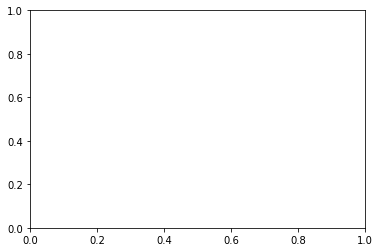

In [804]:
#残差をプロット
train = plt.scatter(y_train_pred,(y_train_pred-y_train_std))
test = plt.scatter(y_test_pred,y_test_pred-y_test_std)
plt.legend((train,test),('Training','Test'),loc='best')